P.S: USING LAB04 CODES TO GENERATE A BETTER MODEL ON MY PREVIOUS ASSIGNMENT WORKS




# **BEST SETTINGS THAT I'VE FOUND IN MY WORK = 62.24%**

*BATCH_SIZE* = 200 \\
AT *ITERATION* 13500 \\
USING 5 *HIDDEN LAYERS* (each having 300 nodes, and *LeakyRELU* as activation layer)
*Learining rate* was 0.01

# **ASSIGNMENT 02**
## **PROBLEM 02 :**
#### Apply only **logistic regression** for the **Ekush** dataset and build a binary classification model that can predict  **male/female** from Bengali handwritten digits with different hyperparameter settings.

In [ ]:
'''
Name : Rahat Bin Osman
ID: 160204083
Group: B1
'''

'\nName : Rahat Bin Osman\nID: 160204083\nGroup: B1\n'

In [ ]:
!gdown --id 1eVuR7pbjFLDmI8xL5qybrSau27vNNeSo

Downloading...
From: https://drive.google.com/uc?id=1eVuR7pbjFLDmI8xL5qybrSau27vNNeSo
To: /content/maleDigits.csv
30.8MB [00:00, 144MB/s] 


In [ ]:
!gdown --id 1BuUNNQkR8T6ALoRvsTY-mApWFvts27BC

Downloading...
From: https://drive.google.com/uc?id=1BuUNNQkR8T6ALoRvsTY-mApWFvts27BC
To: /content/femaleDigits.csv
32.1MB [00:00, 122MB/s] 


In [ ]:
import os 
import zipfile 
import matplotlib.pyplot as plt
import pandas as pd
import shutil 
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
df1=pd.read_csv("/content/maleDigits.csv")
df2=pd.read_csv("/content/femaleDigits.csv")

In [ ]:
'''
Let label 0 for male
and 
Let label 1 for female
'''

df1['label'] = 0
df2['label'] = 1

In [ ]:
print (df1['label'])

0        0
1        0
2        0
3        0
4        0
        ..
15203    0
15204    0
15205    0
15206    0
15207    0
Name: label, Length: 15208, dtype: int64


In [ ]:
dataframes=[df1,df2]
db_all = pd.concat(dataframes, ignore_index=True)
print(db_all.shape)
#db_all['label']
db_labels=db_all['label']
print(db_labels)

(30830, 785)
0        0
1        0
2        0
3        0
4        0
        ..
30825    1
30826    1
30827    1
30828    1
30829    1
Name: label, Length: 30830, dtype: int64


In [ ]:
db_img = db_all.drop(labels = ["label"],axis = 1)
print(db_img.shape)

(30830, 784)


**DATASET IS READY TO USE WITH A TOTAL OF 30830 IMAGES**

> WHERE 90% will go for training and the rest 10% will be used for testing.

In [ ]:
db_img = db_img/255.0 #normalize
db_img = db_img.values.reshape(-1,28,28,1) #Reshape the array into 28 x 28 pixel

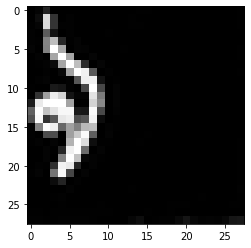

In [ ]:
'''
plotting the img 
'''
show_img = db_img[30800].reshape(28,28)
plt.imshow(show_img, cmap='gray')


In [ ]:
train_img, test_img, train_label, test_label = train_test_split(db_img, db_labels, test_size = 0.1)
train_dataset = list(zip(train_img,train_label))
test_dataset = list(zip(test_img,test_label))

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

27747
3083


# **SETTING 01**


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 100
num_iters = 30000
input_dim = 28*28 #num_features = 784
num_hidden = 1000
output_dim = 10

learning_rate = 0.1

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x.float())
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6989140510559082. Accuracy: 60.88225754135582
Iteration: 1000. Loss: 0.655036211013794. Accuracy: 62.082387285111906
Iteration: 1500. Loss: 0.6511877179145813. Accuracy: 61.758027894907556
Iteration: 2000. Loss: 0.637754499912262. Accuracy: 61.88777165098929
Iteration: 2500. Loss: 0.520005464553833. Accuracy: 61.62828413882582
Iteration: 3000. Loss: 0.6503285765647888. Accuracy: 59.584819980538434
Iteration: 3500. Loss: 0.516806423664093. Accuracy: 62.47161855335712
Iteration: 4000. Loss: 0.5784268379211426. Accuracy: 59.26046059033409
Iteration: 4500. Loss: 0.47842350602149963. Accuracy: 60.81738566331495
Iteration: 5000. Loss: 0.5373415946960449. Accuracy: 57.703535517353224
Iteration: 5500. Loss: 0.5592882633209229. Accuracy: 59.22802465131365
Iteration: 6000. Loss: 0.257182776927948. Accuracy: 61.30392474862147
Iteration: 6500. Loss: 0.25111672282218933. Accuracy: 60.46059033409017
Iteration: 7000. Loss: 0.22153052687644958. Accuracy: 59.97405124878365
Itera

# SETTINGS 2

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 200
num_iters = 30000
input_dim = 28*28 #num_features = 784
num_hidden = 3000
output_dim = 2

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x.float())
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6900898218154907. Accuracy: 51.99481024975673
Iteration: 1000. Loss: 0.688021183013916. Accuracy: 51.99481024975673
Iteration: 1500. Loss: 0.6929113864898682. Accuracy: 52.18942588387934
Iteration: 2000. Loss: 0.6917718648910522. Accuracy: 54.65455724943237
Iteration: 2500. Loss: 0.6907588243484497. Accuracy: 55.98443074927019
Iteration: 3000. Loss: 0.6911302804946899. Accuracy: 56.24391826143367
Iteration: 3500. Loss: 0.6874823570251465. Accuracy: 56.762893285760626
Iteration: 4000. Loss: 0.686323881149292. Accuracy: 57.73597145637366
Iteration: 4500. Loss: 0.6927473545074463. Accuracy: 58.25494648070062
Iteration: 5000. Loss: 0.6849923133850098. Accuracy: 58.384690236782355
Iteration: 5500. Loss: 0.6825270056724548. Accuracy: 58.93610120012974
Iteration: 6000. Loss: 0.6805939674377441. Accuracy: 58.64417774894583
Iteration: 6500. Loss: 0.6829995512962341. Accuracy: 59.065844956211485
Iteration: 7000. Loss: 0.6866599321365356. Accuracy: 59.4550762244567
Iterati

# SETTINGS 3


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 200
num_iters = 30000
input_dim = 28*28 #num_features = 784
num_hidden = 3000
output_dim = 2

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.Tanh()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.Tanh()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x.float())
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6600252389907837. Accuracy: 60.03892312682452
Iteration: 1000. Loss: 0.6848621964454651. Accuracy: 60.42815439506974
Iteration: 1500. Loss: 0.6641996502876282. Accuracy: 60.00648718780409
Iteration: 2000. Loss: 0.669076144695282. Accuracy: 59.844307492701915
Iteration: 2500. Loss: 0.6587255597114563. Accuracy: 60.13623094388583
Iteration: 3000. Loss: 0.6496990323066711. Accuracy: 60.07135906584496
Iteration: 3500. Loss: 0.6446557641029358. Accuracy: 59.74699967564061
Iteration: 4000. Loss: 0.6756950616836548. Accuracy: 60.10379500486539
Iteration: 4500. Loss: 0.6398617625236511. Accuracy: 59.61725591955887
Iteration: 5000. Loss: 0.6508462429046631. Accuracy: 59.29289652935452
Iteration: 5500. Loss: 0.6709608435630798. Accuracy: 60.265974699967565
Iteration: 6000. Loss: 0.6728606224060059. Accuracy: 60.23353876094713
Iteration: 6500. Loss: 0.6822946667671204. Accuracy: 58.384690236782355
Iteration: 7000. Loss: 0.6450417041778564. Accuracy: 60.16866688290626
Itera

# BEST SETTINGS THAT I'VE FOUND IN MY WORK = 62.24%

BATCH_SIZE = 200 \\
AT ITERATION 13500 \\
USING 5 HIDDEN LAYERS (each having 300 nodes, and LeakyRELU as activation layer)
Learining rate was 0.01

# SETTINGS 4

In [34]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 200
num_iters = 13500
input_dim = 28*28 #num_features = 784
num_hidden = 300
output_dim = 2

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_4 = nn.LeakyReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_5 = nn.LeakyReLU()

        ### Output layer: 100 --> 2
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x.float())
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 3rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)

        ### 3rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_5(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6913381814956665. Accuracy: 51.99481024975673
Iteration: 1000. Loss: 0.6940190196037292. Accuracy: 51.99481024975673
Iteration: 1500. Loss: 0.6906114220619202. Accuracy: 51.99481024975673
Iteration: 2000. Loss: 0.6931421756744385. Accuracy: 51.99481024975673
Iteration: 2500. Loss: 0.692850649356842. Accuracy: 52.12455400583847
Iteration: 3000. Loss: 0.6921638250350952. Accuracy: 55.07622445669802
Iteration: 3500. Loss: 0.6921141147613525. Accuracy: 55.20596821277976
Iteration: 4000. Loss: 0.6891820430755615. Accuracy: 55.91955887122932
Iteration: 4500. Loss: 0.6922417283058167. Accuracy: 57.41161206616932
Iteration: 5000. Loss: 0.6895235180854797. Accuracy: 57.8657152124554
Iteration: 5500. Loss: 0.6870647668838501. Accuracy: 58.22251054168018
Iteration: 6000. Loss: 0.6856288313865662. Accuracy: 58.41712617580279
Iteration: 6500. Loss: 0.6843570470809937. Accuracy: 59.065844956211485
Iteration: 7000. Loss: 0.6782258749008179. Accuracy: 59.3577684073954
Iteration

In [ ]:
'''
SAVING THE MODEL
'''
if not os.path.exists("/content/saved_models/"):
    root_path=os.mkdir('/content/saved_models/')
torch.save(model.state_dict(), '/content/saved_models/asm1_p2_60_16_acc.pkl')